In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxopt import solvers,matrix

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.ndimage import interpolation, gaussian_filter

In [3]:
f_digits_vec = "digits4000_txt/digits4000_digits_vec.txt"
f_digits_label = "digits4000_txt/digits4000_digits_labels.txt"
f_digits_trainset = "digits4000_txt/digits4000_trainset.txt"
f_digits_testset = "digits4000_txt/digits4000_testset.txt"

In [4]:
digits_vec = np.loadtxt(f_digits_vec)
digits_label = np.loadtxt(f_digits_label)
digits_trainset = np.loadtxt(f_digits_trainset)
digits_testset = np.loadtxt(f_digits_testset)

In [5]:
print(digits_vec.shape)
print(digits_label.shape)
print(digits_trainset.shape)
print(digits_testset.shape)

(4000, 784)
(4000,)
(2000, 2)
(2000, 2)


In [8]:
import cv2 
SZ = 28
affine_flags = cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR
def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img

Text(0.5, 1.0, 'After Deskewing')

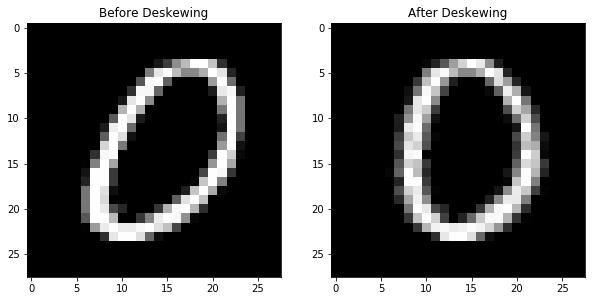

In [9]:
#test deskew function
fig1b, axs1b = plt.subplots(1,2, figsize=(10,20))
first_image2 = digits_vec[102]
pixels2 = first_image2.reshape((28, 28))
desk_image2 = deskew(pixels2)
axs1b[0].imshow(pixels2, cmap='gray')
axs1b[0].set_title('Before Deskewing')
axs1b[1].imshow(desk_image2, cmap='gray')
axs1b[1].set_title('After Deskewing')

In [11]:
import scipy
from scipy.ndimage import interpolation, gaussian_filter
def blurringGaussian(image):
        return gaussian_filter(image, 1)

Text(0.5, 1.0, 'After Blurring')

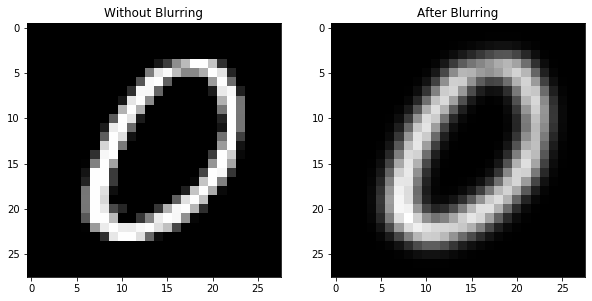

In [66]:
#test blurring
fig1b, axs1b = plt.subplots(1,2, figsize=(10,20))
first_image2 = digits_vec[102]
pixels2 = first_image2.reshape((28, 28))
blurred_image2 = blurringGaussian(pixels2)
axs1b[0].imshow(pixels2, cmap='gray')
axs1b[0].set_title('Without Blurring')
axs1b[1].imshow(blurred_image2, cmap='gray')
axs1b[1].set_title('After Blurring')

In [13]:
def deskewAll(X):
    currents = []
    for i in range(len(X)):
        currents.append(deskew(X[i].reshape(28,28)).flatten())
    return np.array(currents)

digits_vec_deskewed = deskewAll(digits_vec)

In [67]:
#Blurring all training data and test data set 

new_blur_digits_list = []
for row in range(0, len(digits_vec_deskewed)):
    one_digit = digits_vec_deskewed[row].reshape((28, 28))
    new_blur_digits_list.append(blurringGaussian(one_digit.tolist()).flatten())

new_blur_digits = np.array(new_blur_digits_list)

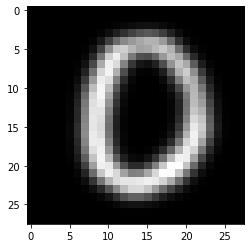

In [68]:
#Sample checkt the effect: Deskewed + Blurred
plt.imshow(new_blur_digits[102].reshape((28, 28)), cmap='gray')
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(new_blur_digits)

# Apply transform to all
new_digit_sets = scaler.transform(new_blur_digits)

In [72]:
from sklearn.decomposition import PCA
pca_90 = PCA(0.95)
pca_90.fit(new_digit_sets)
new_digit_sets_pca = pca_90.transform(new_digit_sets)
new_digit_sets_pca = pca_90.transform(new_digit_sets)

In [73]:
# test_size: what proportion of original data is used for test set
#train_img, test_img, train_lbl, test_lbl = train_test_split(
#    digits_vec, digits_label, test_size=1/5.0, random_state=0)
#train_img, test_img, train_lbl, test_lbl = train_test_split(
#   new_blur_digits, digits_label, test_size=1/2.0, random_state=0)

start_index = digits_trainset[0][1]
end_index = digits_trainset[len(digits_trainset)-1][1]

train_img = new_digit_sets_pca[int(start_index)-1:int(end_index)]
train_lbl = digits_label[int(start_index)-1:int(end_index)]

start_index = digits_testset[0][1]
end_index = digits_testset[len(digits_testset)-1][1]

test_img = new_digit_sets_pca[int(start_index)-1:int(end_index)]
test_lbl = digits_label[int(start_index)-1:int(end_index)]

In [74]:
print(train_img.shape)
print(test_img.shape)

(2000, 77)
(2000, 77)


In [75]:
#Compare the performance between different kernals, and then select the best one
from sklearn.svm import SVC
#polynomial
svclassifier_poly = SVC(kernel='poly', degree=8)
svclassifier_poly.fit(train_img, train_lbl)
#Gaussian Kernel
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(train_img, train_lbl)
#sigmoid Kernel
svclassifier_sigmoid = SVC(kernel='sigmoid')
svclassifier_sigmoid.fit(train_img, train_lbl)


/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
test_pred_poly = svclassifier_poly.predict(test_img)
test_pred_rbf = svclassifier_rbf.predict(test_img)
test_pred_sigmoid = svclassifier_sigmoid.predict(test_img)

In [77]:
print(confusion_matrix(test_lbl, test_pred_poly))
print(classification_report(test_lbl, test_pred_poly))

[[143  24   2   2   3   2   3   1  20   0]
 [  0 189   0   1   1   0   4   1   3   1]
 [  0   7  94   7  12   4   1   5  60  10]
 [  1   1   5 110   3   7   3   3  67   0]
 [  0   6   4   2 129   3   2   2  43   9]
 [  0   7   0   4   2 109   7   1  66   4]
 [  0   2   1   0   3   3 151   7  32   1]
 [  0   0   6   6   6   1   0 145  26  10]
 [  0   5   9   2   3   7   3   1 168   2]
 [  1   4   2   3   9   1   0   2  30 148]]
              precision    recall  f1-score   support

         0.0       0.99      0.71      0.83       200
         1.0       0.77      0.94      0.85       200
         2.0       0.76      0.47      0.58       200
         3.0       0.80      0.55      0.65       200
         4.0       0.75      0.65      0.70       200
         5.0       0.80      0.55      0.65       200
         6.0       0.87      0.76      0.81       200
         7.0       0.86      0.72      0.79       200
         8.0       0.33      0.84      0.47       200
         9.0       0.80     

In [78]:
print(confusion_matrix(test_lbl, test_pred_rbf))
print(classification_report(test_lbl, test_pred_rbf))

[[143   0  55   0   0   1   1   0   0   0]
 [  0 190   3   0   0   0   5   1   0   1]
 [  0   0 191   2   3   1   1   1   1   0]
 [  0   0  86 105   3   3   0   1   2   0]
 [  0   1  63   0 128   0   0   0   1   7]
 [  0   0  74   5   0 111   6   0   4   0]
 [  0   0  56   0   1   0 142   0   1   0]
 [  0   1  74   0   0   0   0 119   1   5]
 [  0   0  71   4   5   4   4   0 110   2]
 [  0   2  36   6   7   0   0   6   0 143]]
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83       200
         1.0       0.98      0.95      0.96       200
         2.0       0.27      0.95      0.42       200
         3.0       0.86      0.53      0.65       200
         4.0       0.87      0.64      0.74       200
         5.0       0.93      0.56      0.69       200
         6.0       0.89      0.71      0.79       200
         7.0       0.93      0.59      0.73       200
         8.0       0.92      0.55      0.69       200
         9.0       0.91     

In [79]:
print(confusion_matrix(test_lbl, test_pred_sigmoid))
print(classification_report(test_lbl, test_pred_sigmoid))

[[88  0 33  3  1 53 16  4  2  0]
 [ 0 85  4  9 78 19  0  4  0  1]
 [68 14 48 13 12  1 33  7  4  0]
 [32 29 26 67  1 10  5 16 13  1]
 [17 51 10  1 65 12 18 12  4 10]
 [74 34  2  9  5 43 14  4  5 10]
 [39 41 28  1 10 22 47  0 12  0]
 [27 28 24 23  5 14  7 53  2 17]
 [35 51 11 18  4 11 15  1 41 13]
 [20 48  5  5 12  5  5 46  5 49]]
              precision    recall  f1-score   support

         0.0       0.22      0.44      0.29       200
         1.0       0.22      0.42      0.29       200
         2.0       0.25      0.24      0.25       200
         3.0       0.45      0.34      0.38       200
         4.0       0.34      0.33      0.33       200
         5.0       0.23      0.21      0.22       200
         6.0       0.29      0.23      0.26       200
         7.0       0.36      0.27      0.31       200
         8.0       0.47      0.20      0.28       200
         9.0       0.49      0.24      0.33       200

    accuracy                           0.29      2000
   macro avg       

Refer to the above result, the accuracy of SVM with using Gaussian Kernel is the best.
So we start the do the parameter tunning on the SVM with Gaussian Kernal

In [80]:
#Use GridSearchCV to do Cross Validation, select the best parameters on C, gamma for rbf
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(train_img, train_lbl) 

/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.309, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.352, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.146, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.157, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.144, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.394, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.466, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.445, total=   0.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   17.9s finished
/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [62]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [81]:
from datetime import datetime, time
def date_diff_in_milliseconds(dt2, dt1):
  timedelta = dt2 - dt1
  return timedelta.total_seconds() * 1000

In [82]:
starttime = datetime.now()

test_pred_rbf_tune = grid.predict(test_img)

endtime = datetime.now()
print(date_diff_in_milliseconds(endtime, starttime))

219.83700000000002


In [83]:
print(confusion_matrix(test_lbl, test_pred_rbf_tune))
print(classification_report(test_lbl, test_pred_rbf_tune))

[[189   0   2   0   0   5   4   0   0   0]
 [  0 195   1   0   0   0   2   2   0   0]
 [  1   2 175   2   6   2   2   4   4   2]
 [  0   0  10 171   2   5   0   4   7   1]
 [  0   1   6   0 180   0   3   0   3   7]
 [  2   1   5   3   0 166  10   0  10   3]
 [  1   0   2   1   4   5 187   0   0   0]
 [  0   2   7   1   3   2   0 179   0   6]
 [  0   2   9   4  14   9   6   1 153   2]
 [  1   2   3   6   8   2   0   8   2 168]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       200
         1.0       0.95      0.97      0.96       200
         2.0       0.80      0.88      0.83       200
         3.0       0.91      0.85      0.88       200
         4.0       0.83      0.90      0.86       200
         5.0       0.85      0.83      0.84       200
         6.0       0.87      0.94      0.90       200
         7.0       0.90      0.90      0.90       200
         8.0       0.85      0.77      0.81       200
         9.0       0.89     